<a href="https://colab.research.google.com/github/kiankhali/Araia_projekt/blob/main/Optical_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/Guillem96/spynet-pytorch

  Cloning https://github.com/Guillem96/spynet-pytorch to /tmp/pip-req-build-2rg3bik1
  Running command git clone --filter=blob:none --quiet https://github.com/Guillem96/spynet-pytorch /tmp/pip-req-build-2rg3bik1
  Resolved https://github.com/Guillem96/spynet-pytorch to commit 3685b030b24e33379a09c3b8dcaf4974843e8e67
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-

In [9]:
from pathlib import Path
import zipfile
import torch
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import torchvision.transforms as T
import spynet

#Opening Zip-file


In [ ]:
zip_file_path = '/content/drive/MyDrive/lab44_resized.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/entpackter_ordner')


#Selecting the Images from Dataset

In [20]:
img1_path='/content/drive/MyDrive/entpackter_ordner/lab44_resized/User_10_lab44_frame_0001.jpg'
img2_path='/content/drive/MyDrive/entpackter_ordner/lab44_resized/User_10_lab44_frame_0002.jpg'

img1=Image.open(img1_path)
img2=Image.open(img2_path)

#Opening the Images


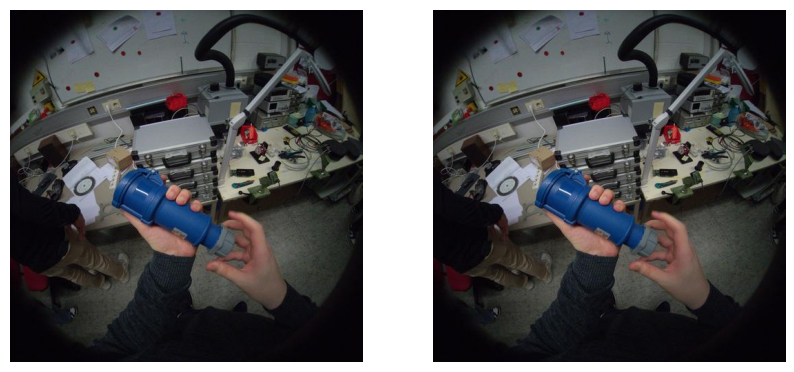

Shape img1: (512, 512, 3)
Shape img2: (512, 512, 3)


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

plt.show()
print('Shape img1:',np.array(img1).shape)
print('Shape img2:',np.array(img2).shape)

# Using black and white images

In [23]:
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')
img1_array = np.array(img1_gray)
img2_array = np.array(img2_gray)
flow = cv.calcOpticalFlowFarneback(img1_array,
                                   img2_array,
                                   None, 0.5, 3, 15, 3, 5, 1.2, 0)



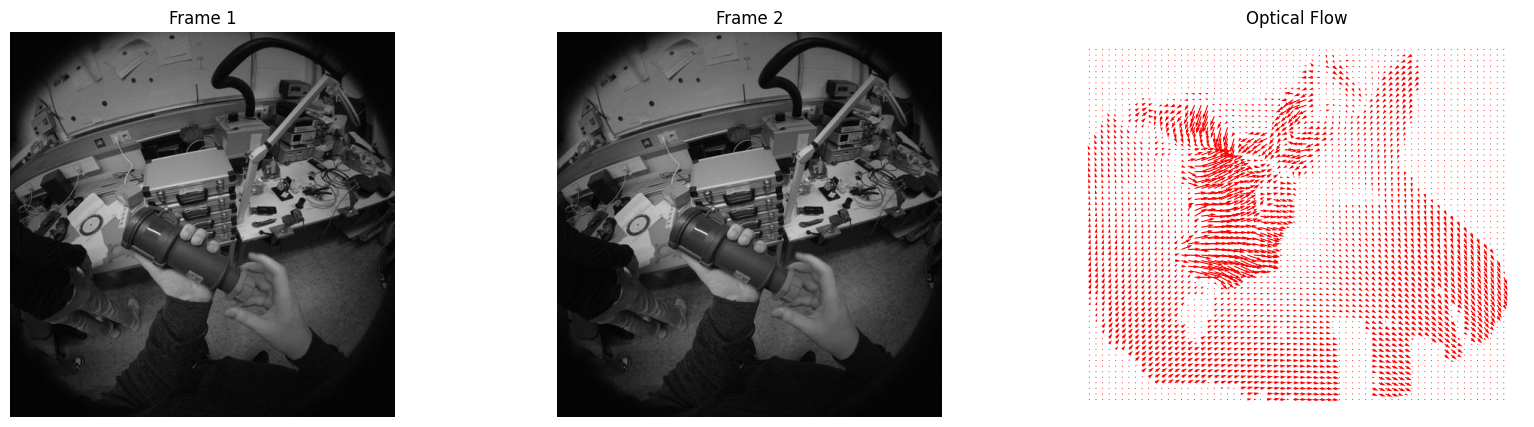

In [27]:
height, width = img1_array.shape
step =8
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.title('Frame 1')
plt.imshow(img1_gray, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Frame 2')
plt.imshow(img2_gray, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Optical Flow')
Y, X = np.mgrid[0:height:step, width:0:-step]
plt.quiver(X, Y,
           flow[::step, ::step, 0], flow[::step, ::step, 1],color='r')
plt.axis('off');

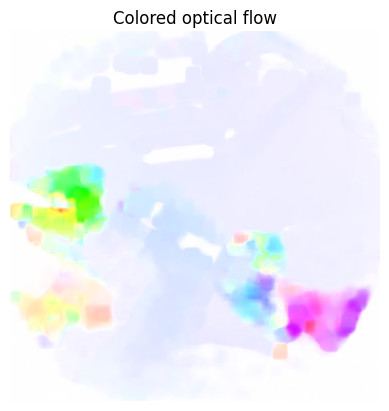

In [ ]:
plt.title('Colored optical flow')
plt.imshow(spynet.flow.flow_to_image(flow))
plt.axis('off');

# Deep learning approach

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

@torch.no_grad()
def predict(frames1, frames2):
    images1 = torch.stack([tfms(o.convert('RGB')) for o in frames1]).to(device)
    images2 = torch.stack([tfms(o.convert('RGB')) for o in frames2]).to(device)
    return model((images1, images2))

tfms = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[.485, .406, .456],
                std= [.229, .225, .224])
])

model = spynet.SpyNet.from_pretrained('flying-chair')
model.to(device)
model.eval()

flow = predict([img1], [img2])[0]
plt.imshow(spynet.flow.flow_to_image(flow))
plt.axis('off');

UnpicklingError: invalid load key, '<'.

# For more than two images

In [4]:
from glob import glob

In [25]:
def plot_images(img1, img2, flow):
    height, width = img1.shape
    step = 8
    plt.figure(figsize=(20, 5))

    plt.subplot(131)
    plt.title('Frame 1')
    plt.imshow(img1, cmap='gray')
    plt.axis('off')

    plt.subplot(132)
    plt.title('Frame 2')
    plt.imshow(img2, cmap='gray')
    plt.axis('off')

    plt.subplot(133)
    plt.title('Optical Flow')
    Y, X = np.mgrid[0:height:step, 0:width:step]
    plt.quiver(X, Y, flow[::step, ::step, 0], flow[::step, ::step, 1], color='r')
    plt.axis('off')
    plt.show()


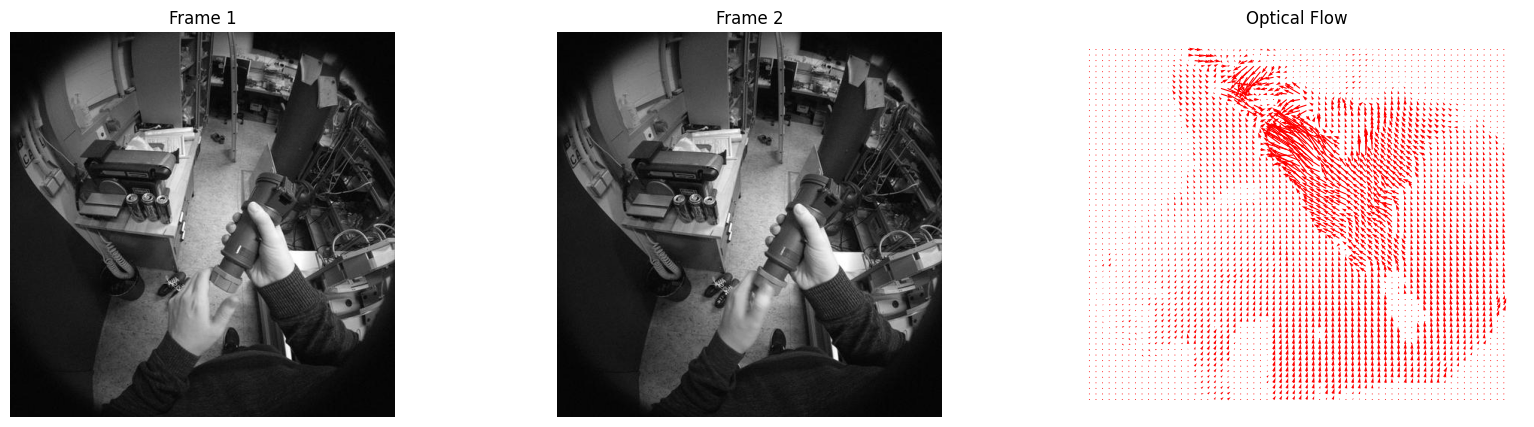

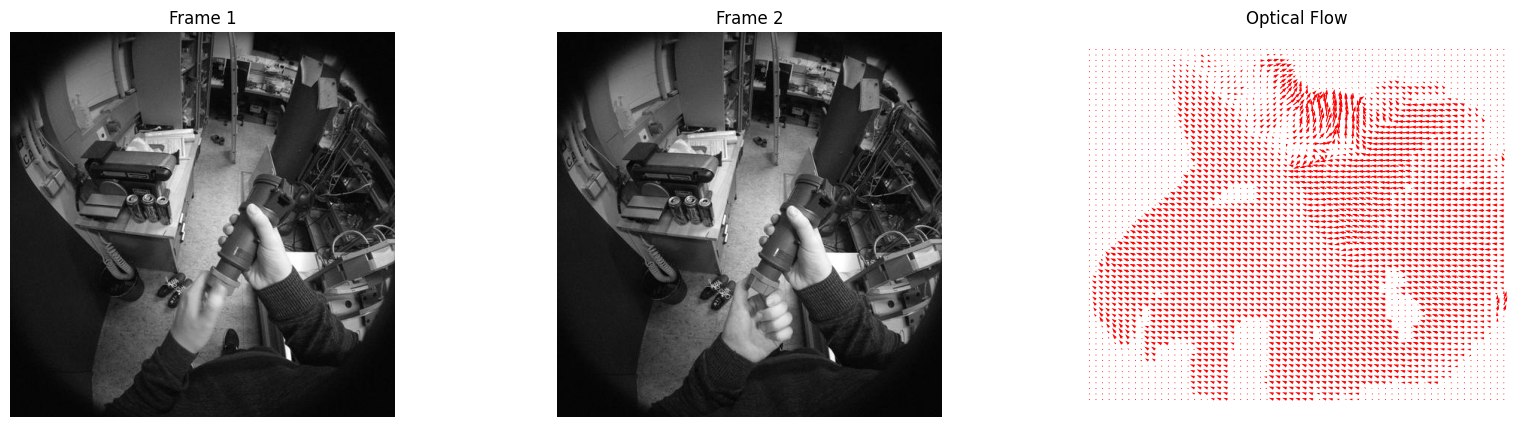

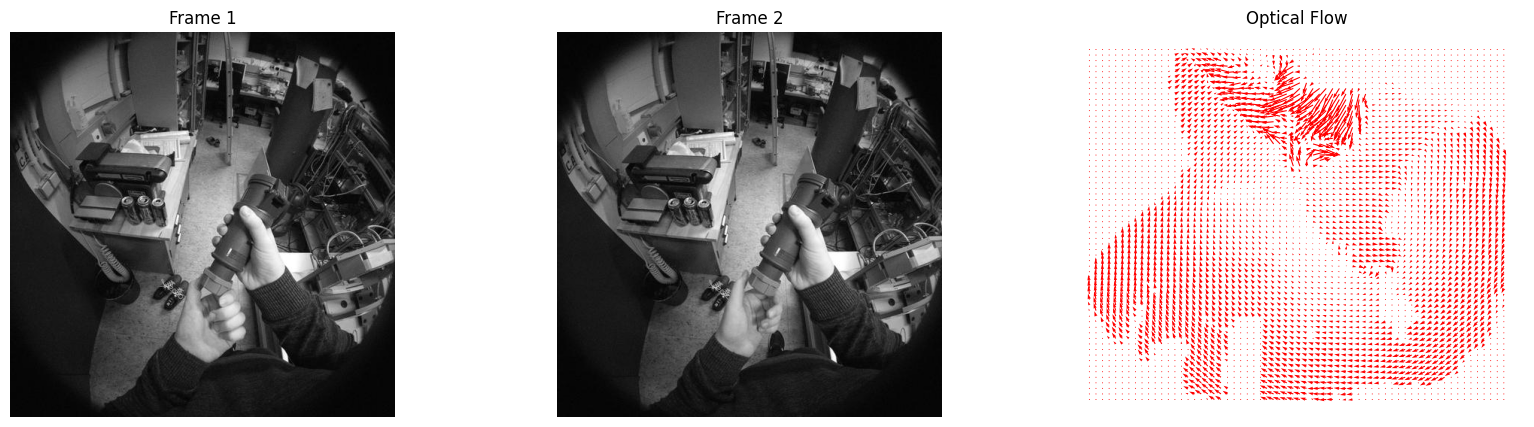

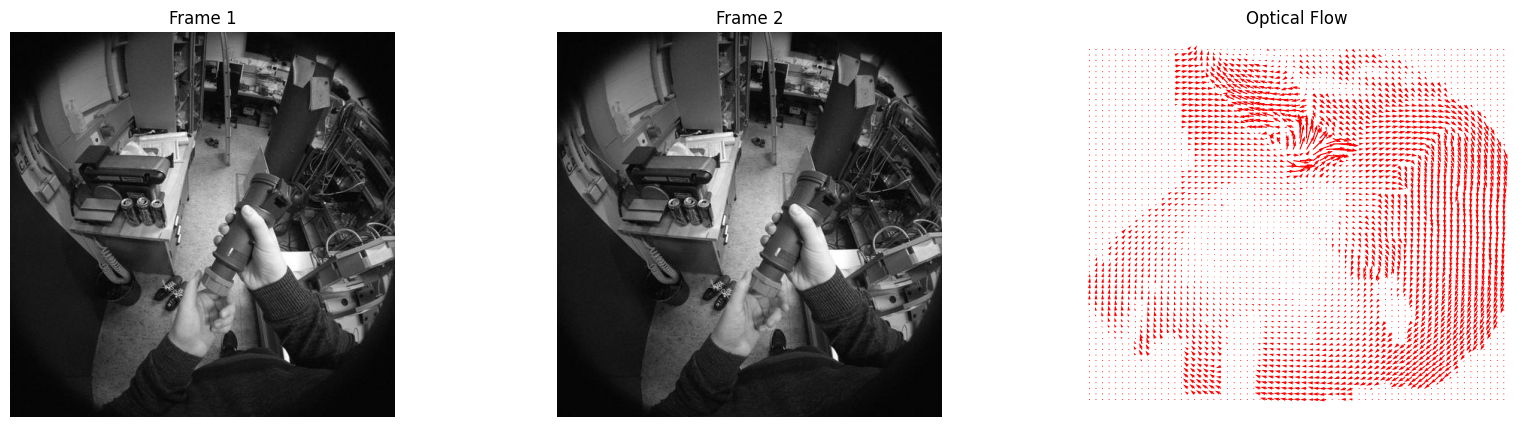

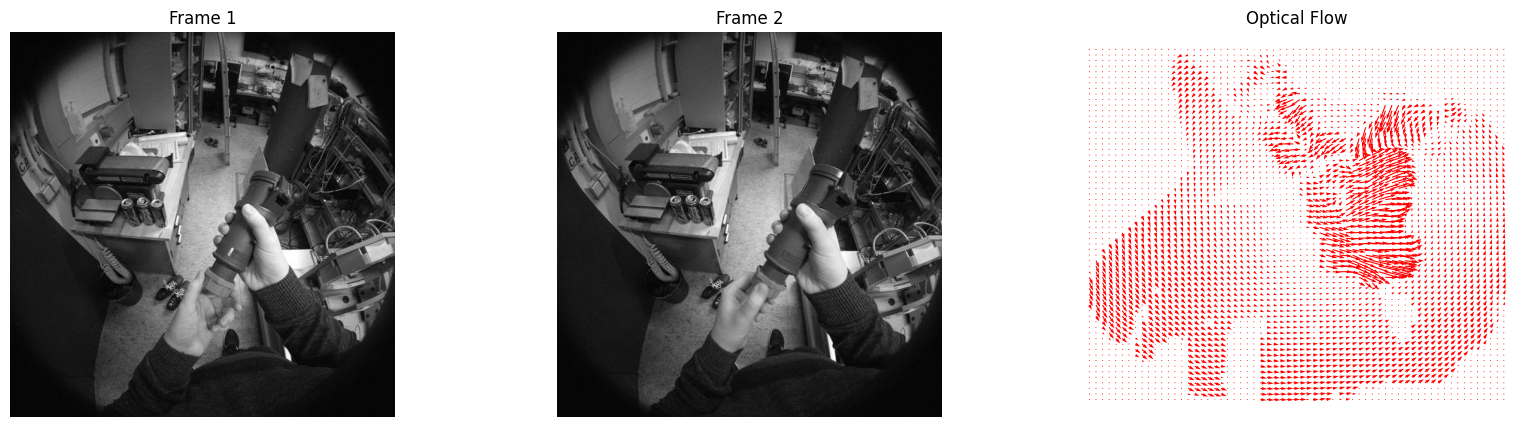

In [26]:
for i in range(5):
    img1 = Image.open(image_files[i]).convert('L')
    img2 = Image.open(image_files[i + 1]).convert('L')

    img1_array = np.array(img1)
    img2_array = np.array(img2)

    flow = cv.calcOpticalFlowFarneback(img1_array, img2_array, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    plot_images(img1_array, img2_array, flow)